<a href="https://colab.research.google.com/github/sb-0709/Link-Prediction-and-Community-Detection-in-Amazon-Network/blob/main/sin_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of nodes: 334863
Number of edges: 925872
The node with the maximum degree is 548091 with a degree of 549.


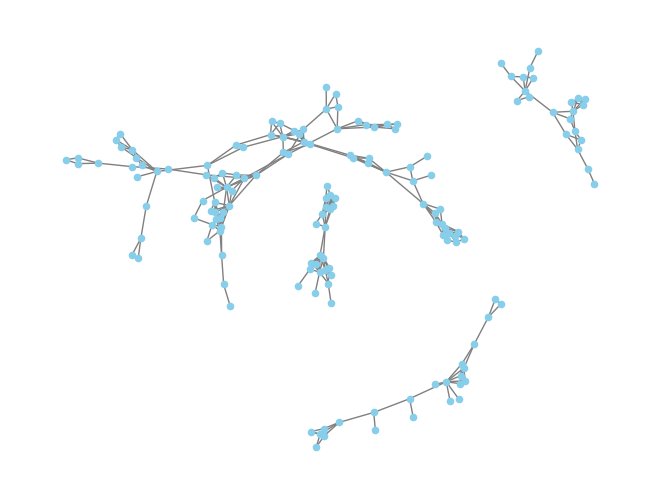

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import ast
# with open("output.txt") as hashes:
#     input = ast.literal_eval(hashes.read())
#     sample_five = random.sample(input, 5)

#     print sample_five

# Create an empty graph
G = nx.Graph()

# Define the path to your text file
file_path = "com-amazon.ungraph.txt"

# Read the text file and add edges to the graph
with open(file_path, 'r') as file:
    for line in file:
        if not line.startswith("#") and line.strip():  # Ignore comments and empty lines
            source, target = map(int, line.strip().split())
            G.add_edge(source, target)

# Print some basic information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

node_degrees = dict(G.degree())

# Find the maximum degree
max_degree_node = max(node_degrees, key=node_degrees.get)
max_degree = node_degrees[max_degree_node]

print(f"The node with the maximum degree is {max_degree_node} with a degree of {max_degree}.")

def criteria(node):
    return G.degree(node) > 50 and G.degree(node) < 550        # Keep nodes with a degree greater than 5

# Create the subset graph by filtering nodes based on the criteria
subset_nodes = [node for node in G.nodes() if criteria(node)]
subset_graph = G.subgraph(subset_nodes)


# # Choose a central node for the subset
# central_node = 548091  # Replace with the desired node

# # Get neighbors of the central node
# neighbors = list(G.neighbors(central_node))

# # Create the subset graph with the central node and its neighbors
# subset_nodes = [central_node] + neighbors
# subset_graph = G.subgraph(subset_nodes)


# print(G)
# G1 = random.sample(sorted(G), 40)
# print(G1)
# Visualize the graph (optional)
# Note: You may need to install matplotlib for visualization

components = list(nx.connected_components(subset_graph))

# Define a threshold for the minimum size of a component to keep
min_component_size = 20  # Adjust as needed

# Create a new graph with only components that meet the size threshold
filtered_components = [component for component in components if len(component) >= min_component_size]

# Create a new graph with only the desired components
filtered_graph = subset_graph.subgraph(set(node for component in filtered_components for node in component))

# If you want to remove isolated nodes (nodes not belonging to any connected component), you can do it like this:
# isolated_nodes = list(nx.isolates(filtered_graph))
# filtered_graph.remove_nodes_from(isolated_nodes)

pos = nx.spring_layout(filtered_graph)  # Layout algorithm for graph visualization
# nx.draw(G1, pos, with_labels=False, node_size=10)
nx.draw(filtered_graph, pos, with_labels=False, node_size=20, font_size=8, font_color="black", node_color="skyblue", edge_color="gray")

plt.show()



In [ ]:
# import networkx as nx
import plotly.graph_objs as go

# Load your NetworkX graph or create one
# G = nx.Graph()

# Convert the NetworkX graph to a Plotly graph
# pos = nx.spring_layout(G)  # You can use a layout algorithm to position the nodes
edge_x = []
edge_y = []
for edge in filtered_graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='black'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_adjacencies = []
node_text = []
for node in filtered_graph.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    degree = sum(1 for _ in filtered_graph.neighbors(node))

    node_adjacencies.append(degree)
    node_text.append(f'Node {node}<br># of connections: {degree}')


node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Viridis',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )
    )
)

# for node in filtered_graph.nodes():
#     node_adjacencies.append(len(filtered_graph.neighbors(node)))
#     node_text.append(f'Node {node}<br># of connections: {len(filtered_graph.neighbors(node))}')

node_trace.marker.color = node_adjacencies
node_trace.text = node_text


In [ ]:
fig = go.Figure(data=[edge_trace, node_trace])

fig.update_layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)
# Remove the x-axis and y-axis tick labels
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)

fig.show()


In [ ]:
# import pickle
# # pos = nx.spring_layout(G)
# with open("graph_layout.pkl", "wb") as file:
#     pickle.dump(pos, file)

In [ ]:
# # Load the layout from the saved file
# with open("graph_layout.pkl", "rb") as file:
#     pos = pickle.load(file)

In [ ]:
import community
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain
from itertools import count
import pandas as pd

In [ ]:
G1 = filtered_graph

In [ ]:
def adamic_adar_index(G1, ebunch=None):
    from math import log
    if ebunch is None:
        ebunch = nx.non_edges(G1)
    def predict(u, v):
        return sum(1/log(G1.degree(w)) for w in nx.common_neighbors(G1, u, v))
    return ((u, v, predict(u, v)) for u, v in ebunch)

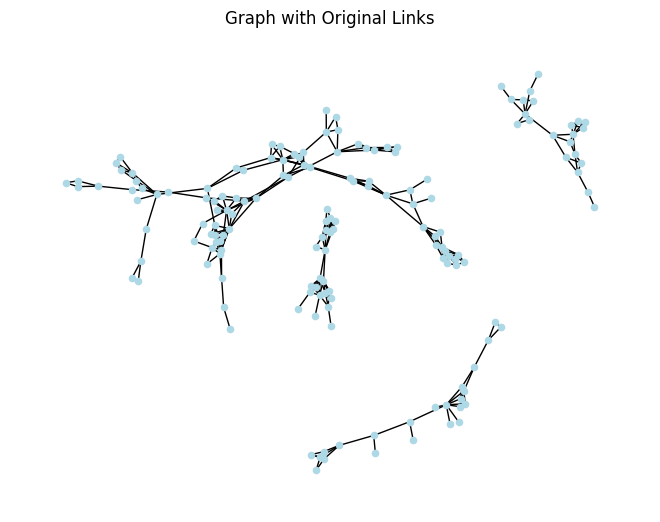

In [ ]:
# pos = nx.spring_layout(filtered_graph)
nx.draw(filtered_graph, pos, with_labels=False, node_color='lightblue', node_size=20, font_size=10)
plt.title('Graph with Original Links')
plt.show()

Number of edges predicted:  108
Predicted edges are:  [(513026, 29066), (241157, 53885), (241157, 162283), (246806, 415888), (533023, 514809), (462375, 434781), (462375, 6449), (145964, 534635), (123436, 180888), (123436, 121194), (269877, 54379), (69693, 67456), (341570, 449223), (341570, 29543), (341570, 199628), (341570, 504310), (72263, 291216), (399944, 85586), (332882, 317053), (332882, 98756), (268369, 219958), (268369, 444828), (268369, 369145), (329813, 515756), (329813, 206514), (329813, 408860), (329813, 444828), (269400, 110214), (269400, 19217), (434781, 78662), (434781, 466257), (434781, 123758), (492127, 291216), (492127, 532654), (492127, 40399), (534635, 21941), (528497, 299899), (528497, 105186), (353397, 537519), (353397, 35512), (458358, 180388), (317053, 21941), (53885, 162283), (359553, 268626), (110214, 180678), (175247, 95635), (415888, 268626), (415888, 98756), (415888, 199628), (180888, 121194), (284825, 396726), (515756, 284576), (423086, 119157), (423086, 14

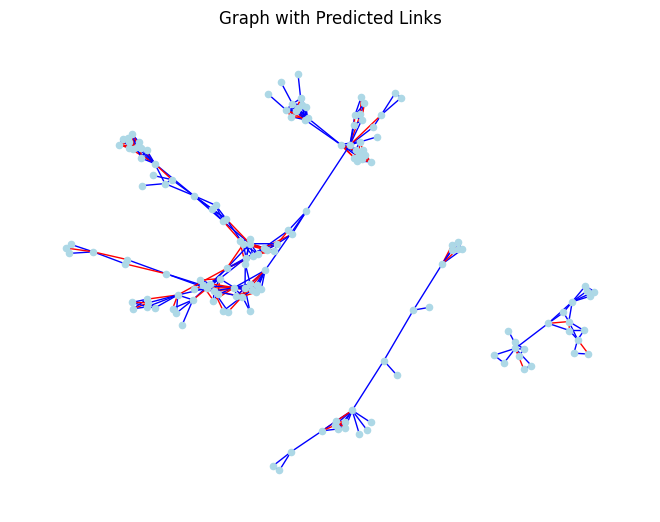

In [ ]:
# Calculate Adamic-Adar Index for each potential edge
adamic_adar_scores = list(nx.adamic_adar_index(G1))

# Define a threshold value to determine which edges to add
threshold = 1

# Create a new graph to store the predicted links
predicted_links_graph = nx.Graph()

# predicted_edges = sorted(adamic_adar_index(G1), key=lambda x: -x[2])[:5]
# added_edges = []
# for i in predicted_edges:
#     added_edges.append((i[0],i[1]))
# predicted_links_graph.add_edges_from(added_edges)
# plt.figure()
# print(predicted_edges)

added_edges = []

# Add edges to the new graph based on the threshold
for u, v, score in adamic_adar_scores:
    if score > threshold:
        predicted_links_graph.add_edge(u, v)
        added_edges.append((u,v))

print("Number of edges predicted: ", len(added_edges))
print("Predicted edges are: ", added_edges)
# Combine the original graph with the predicted links graph
combined_graph = nx.compose(G1, predicted_links_graph)

# Define a list to hold edge colors
edge_colors = []

# Iterate through the edges and assign colors
for u, v in combined_graph.edges():
    if (u, v) in added_edges or (v, u) in added_edges:
        # New edges are assigned a different color (e.g., red)
        edge_colors.append('red')
    else:
        # Existing edges are assigned a different color (e.g., blue)
        edge_colors.append('blue')

# Visualize the updated graph
pos1 = nx.spring_layout(combined_graph)
nx.draw(combined_graph, pos1, with_labels=False, node_color='lightblue', node_size=20, font_size=10, edge_color=edge_colors)
plt.title('Graph with Predicted Links')
plt.show()


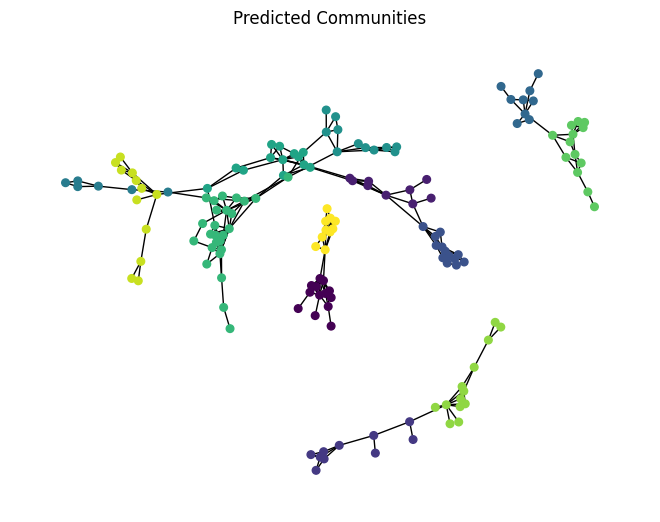

In [ ]:
# Community Detection using Louvain Method
best_partition = None
max_modularity = float('-inf')
for i in range(10):
    partition = community_louvain.best_partition(G1)
    modularity = community_louvain.modularity(partition, G1)
    if modularity > max_modularity:
        best_partition = partition
        max_modularity = modularity
    node_color = [best_partition.get(node) for node in G1.nodes()]

# Visualizing the Predicted Communities
# pos2 = nx.spring_layout(G1)
nx.draw(G1, pos, node_color=node_color, with_labels=False, node_size=30)
fig = plt.figure(1, figsize=(200, 80), dpi=60)
plt.title("Predicted Communities")
plt.show()

In [ ]:
# Analyzing Network Metrics
print()
communities = {}
for node, community in best_partition.items():
    if community not in communities:
        communities[community] = []
    communities[community].append(node)
print("Communities:")
for i, nodes in communities.items():
    print(f"Community {i}: {nodes}")


Communities:
Community 0: [502784, 123436, 180888, 262841, 501444, 198381, 244004, 502086, 121194, 143261, 335281, 147895, 33247]
Community 1: [513026, 531483, 277567, 72263, 437373, 129907, 29065, 26009, 156663]
Community 2: [241157, 66589, 28211, 406114, 53885, 226952, 452755, 528621, 482263, 162283]
Community 8: [13323, 145964, 273452, 269877, 341570, 332882, 534635, 54379, 353397, 317053, 359553, 175247, 415888, 35512, 449223, 517948, 268626, 29543, 66440, 537519, 21941, 53175, 98756, 199628, 211438, 504310]
Community 4: [498702, 37981, 458358, 51350, 180388, 146598, 123777, 38365, 175102]
Community 5: [399380, 475343, 404736, 360318, 95635, 542119]
Community 6: [246806, 533023, 423086, 113347, 278728, 514809, 119157, 518019, 143826, 298460, 439797]
Community 7: [462375, 399944, 85586, 434781, 411230, 21209, 53493, 6449, 78662, 466257, 123758, 29066, 61845]
Community 9: [460845, 69693, 520843, 284825, 236190, 438001, 224024, 194384, 147308, 222074, 449404, 67456, 396726]
Community

In [ ]:
# Adding a New Node and Predict Its Community
new_node = max(G1.nodes()) + 1
G2 = G1.copy()
G2.add_node(new_node)
new_node_edges = sorted(adamic_adar_index(G2, [(new_node, n) for n in G2.nodes()]), key=lambda x: -x[2])[:5]
new_added_edges=[]
for i in new_added_edges:
    new_added_edges.append((i[0],i[1]))
G2.add_edges_from(new_added_edges)
partition_new_node = community_louvain.best_partition(G2)
print(f"Predicted community for new node {new_node}: {partition_new_node[new_node]}")

Predicted community for new node 542120: 4


In [ ]:
# Computing Network Analysis Metrics
degree_centrality = nx.degree_centrality(G1)
betweenness_centrality = nx.betweenness_centrality(G1)
closeness_centrality = nx.closeness_centrality(G1)
eigenvector_centrality = nx.eigenvector_centrality(G1, max_iter=500)
clustering_coefficient = nx.clustering(G1)

In [ ]:
network_analysis=[]
network_analysis.append(degree_centrality)
network_analysis.append(betweenness_centrality)
network_analysis.append(closeness_centrality)
network_analysis.append(eigenvector_centrality)
network_analysis.append(clustering_coefficient)
df = pd.DataFrame(network_analysis).T
df.columns=["Degree Centrality", "Betweenness Centrality", "Closeness Centrality", "Eigen Vector Centrality", "Clustering Coefficient"]
print(df)

        Degree Centrality  Betweenness Centrality  Closeness Centrality  \
502784           0.063694                0.003573              0.064225   
513026           0.031847                0.073781              0.126131   
241157           0.019108                0.000000              0.028283   
13323            0.012739                0.000000              0.096837   
498702           0.019108                0.000082              0.043889   
...                   ...                     ...                   ...   
156663           0.025478                0.000000              0.108035   
263672           0.019108                0.000000              0.044678   
369145           0.038217                0.000653              0.045335   
175102           0.012739                0.000000              0.042559   
179199           0.019108                0.000000              0.085080   

        Eigen Vector Centrality  Clustering Coefficient  
502784             3.871573e-05          